In [66]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
#we also need to install geopy

In [56]:
#load lat long units
units = pd.read_csv('VW_LAT_LON_UNITS.csv')
units

,Unit Cd,Latitude,Longitude
0,KV00,35.743512,-84.396505
1,YZ01,37.094055,-95.586133
2,CF40,41.601493,-90.539350
3,2002,-18.173820,-47.942330
4,NW01,-18.173820,-47.942300
...,...,...,...
255,JZ01,55.440303,37.766149
256,3D00,55.440303,37.766149
257,2T00,59.624073,17.894668
258,4200,59.624073,17.894668


In [57]:
dataset = pd.read_csv('CA_PLANT_ADDRESS.CSV')
dataset = dataset.rename(columns = {'Plant':'Unit Cd'})
# us_plants = dataset.loc[dataset['Country'] == 'US'] 
# # us_plants.sort_values(by= 'Street', ascending=True)
# us_plants.head()

In [58]:
dataset.columns

Index(['City', 'Company Code', 'Company Code Name', 'Country', 'Currency Key',
       'Customer No Plant', 'Distribution Channel', 'Factory Calendar',
       'Inter Company Billing', 'Landscape Name', 'Language', 'MRP',
       'Planning Plant', 'Unit Cd', 'Plant Name', 'Plant Name Line 2',
       'Primary Landscape', 'Purchasing Org', 'Sales Org', 'State', 'Street',
       'Tax Jurisdiction', 'Valuation Area', 'Vendor No Plant', 'Zip Code'],
      dtype='object')

In [59]:
unit_location = dataset.merge(units, on='Unit Cd')
unit_location.shape

(165, 27)

In [77]:
unit_location.columns

Index(['City', 'Company Code', 'Company Code Name', 'Country', 'Currency Key',
       'Customer No Plant', 'Distribution Channel', 'Factory Calendar',
       'Inter Company Billing', 'Landscape Name', 'Language', 'MRP',
       'Planning Plant', 'Unit Cd', 'Plant Name', 'Plant Name Line 2',
       'Primary Landscape', 'Purchasing Org', 'Sales Org', 'State', 'Street',
       'Tax Jurisdiction', 'Valuation Area', 'Vendor No Plant', 'Zip Code',
       'Latitude', 'Longitude', 'geometry'],
      dtype='object')

In [60]:
#select only important columns
unit_location = unit_location.loc[:,['City', 'Company Code', 'Company Code Name', 'Country','Unit Cd', 'Plant Name', 'Plant Name Line 2','Latitude', 'Longitude']]
#export to csv
unit_location

,City,Company Code,Company Code Name,Country,Currency Key,Customer No Plant,Distribution Channel,Factory Calendar,Inter Company Billing,Landscape Name,...,Purchasing Org,Sales Org,State,Street,Tax Jurisdiction,Valuation Area,Vendor No Plant,Zip Code,Latitude,Longitude
0,Ormes,2200,JD France (Marketing),FR,EUR,NaN,1.0,22,11.0,A2,...,A000,2200,45,10 Rue du Paradis,NaN,2200,NaN,45140,47.940952,1.823131
1,Crestmead,2300,"John Deere Ltd, Australia",AU,AUD,99999T2302,25.0,A1,11.0,A2,...,A000,2300,QLD,166-170 Magnesium Drive,NaN,2302,99999T2302,4132,-27.679896,153.078519
2,Walldorf,4900,JD Walldorf GmbH & Co.KG,DE,EUR,NaN,1.0,27,11.0,A2,...,A000,2700,8,Impexstrasse 3,NaN,2700,NaN,69190,49.292415,8.663808
3,Boksburg,7J00,JD Asia Singapore SA Bran,ZA,USD,NaN,NaN,29,NaN,A2,...,A000,NaN,GP,Oscar Street 303,NaN,2900,NaN,1459,-26.184292,28.226466
4,"Langar, Notts.",3100,John Deere Limited (UK),GB,GBP,NaN,1.0,31,11.0,A2,...,P000,3100,NT,Harby Road,NaN,3100,NaN,NG 13 9HT,52.895710,-0.913240


In [71]:
#convert from lat long to point geodataframe
gdf = gpd.GeoDataFrame(
    unit_location, 
    geometry=gpd.points_from_xy(unit_location.Longitude, unit_location.Latitude))
gdf.head()

,City,Company Code,Company Code Name,Country,Currency Key,Customer No Plant,Distribution Channel,Factory Calendar,Inter Company Billing,Landscape Name,...,Sales Org,State,Street,Tax Jurisdiction,Valuation Area,Vendor No Plant,Zip Code,Latitude,Longitude,geometry
0,Ormes,2200,JD France (Marketing),FR,EUR,NaN,1.0,22,11.0,A2,...,2200,45,10 Rue du Paradis,NaN,2200,NaN,45140,47.940952,1.823131,POINT (1.82313 47.94095)
1,Crestmead,2300,"John Deere Ltd, Australia",AU,AUD,99999T2302,25.0,A1,11.0,A2,...,2300,QLD,166-170 Magnesium Drive,NaN,2302,99999T2302,4132,-27.679896,153.078519,POINT (153.07852 -27.67990)
2,Walldorf,4900,JD Walldorf GmbH & Co.KG,DE,EUR,NaN,1.0,27,11.0,A2,...,2700,8,Impexstrasse 3,NaN,2700,NaN,69190,49.292415,8.663808,POINT (8.66381 49.29241)
3,Boksburg,7J00,JD Asia Singapore SA Bran,ZA,USD,NaN,NaN,29,NaN,A2,...,NaN,GP,Oscar Street 303,NaN,2900,NaN,1459,-26.184292,28.226466,POINT (28.22647 -26.18429)
4,"Langar, Notts.",3100,John Deere Limited (UK),GB,GBP,NaN,1.0,31,11.0,A2,...,3100,NT,Harby Road,NaN,3100,NaN,NG 13 9HT,52.895710,-0.913240,POINT (-0.91324 52.89571)


In [74]:
units_geo = gdf.loc[:,['Plant Name','geometry']]
units_geo.head()

,Plant Name,geometry
0,John Deere Ormes,POINT (1.82313 47.94095)
1,John Deere Limited - Brisbane,POINT (153.07852 -27.67990)
2,John Deere Vertrieb,POINT (8.66381 49.29241)
3,JD Asia Singapore,POINT (28.22647 -26.18429)
4,John Deere Limited,POINT (-0.91324 52.89571)


In [33]:
from geopandas.tools import geocode
#providers: options are: dict_keys(['algolia', 'arcgis', 'azure', 'baidu', 'baiduv3', 
#'banfrance', 'bing', 'databc', 'geocodeearth', 'geocodio', 'geonames', 'google', 'googlev3',
#'geolake', 'here', 'herev7', 'ignfrance', 'mapbox', 'mapquest', 'maptiler', 'nominatim', 
#'opencage', 'openmapquest', 'pickpoint', 'pelias', 'photon', 'liveaddress', 'tomtom', 
#'what3words', 'what3wordsv3', 'yandex'])
#use the geocode tool and use the arcgis provider as geocoder
# unit_locations = geocode(us_plants['Street'], provider = 'arcgis')

The 'unit_locations' has only geometry and address, we need to join back to the original dataframe.

In [67]:
#join unit_location to original dataset
unit_name_loc = us_plants.merge(unit_locations, on='address')
unit_name_loc.head()

KeyError: 'address'

In [32]:
# unit_locations.sort_values(by='address', ascending = True).head()

In [65]:
#convert to  geodataframe for plotting map
geo_dataset = gpd.GeoDataFrame(units_coords, crs=4326)

<ipython-input-65-0436100b898b>:2: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  geo_dataset = gpd.GeoDataFrame(units_coords, crs=4326)


In [82]:
#read data shape
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# gpd.datasets.get_path()
# gpd.datasets.available

ImportError: the 'read_file' function requires the 'fiona' package, but it is not installed or does not import correctly.
Importing fiona resulted in: No module named 'fiona'

<AxesSubplot:>

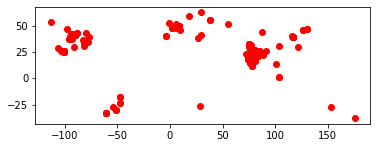

In [75]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# geo_dataset.plot(ax=ax, color="white", edgecolor="black");
units_geo.plot(ax=ax, color="red")